# `sns.catplot()` 详细介绍

`seaborn.catplot()` 是 Seaborn 库中用于绘制分类数据的高级函数，它提供了统一的接口来创建多种类型的分类图表。这个函数实际上是多个分类绘图函数的更高级封装，通过指定 `kind` 参数可以选择不同类型的图表。

## 基本语法
```python
sns.catplot(
    data=None, *,
    x=None, y=None, hue=None, row=None, col=None,
    kind='strip', height=5, aspect=1, palette=None,
    hue_order=None, hue_norm=None, legend='auto',
    legend_out=True, sharex=True, sharey=True,
    margin_titles=False, facet_kws=None, **kwargs
)
```

## 核心参数说明

1. **数据参数**：
   - `x`, `y`：指定分类变量和数值变量
   - `hue`：用于分组的次级分类变量
   - `row`, `col`：用于分面的变量，创建多面板图形

2. **图表类型参数**：
   - `kind`：指定图表类型，可选值包括：
     - `'strip'`：带状图（默认）
     - `'swarm'`：蜂群图
     - `'box'`：箱线图
     - `'violin'`：小提琴图
     - `'boxen'`：增强箱线图
     - `'point'`：点图
     - `'bar'`：条形图
     - `'count'`：计数图

3. **图形布局参数**：
   - `height`：每个分面的高度（英寸）
   - `aspect`：每个分面的宽高比
   - `legend_out`：是否将图例放在图形外
   - `sharex`, `sharey`：是否共享x/y轴

4. **样式参数**：
   - `palette`：调色板名称或颜色列表
   - `hue_order`：指定hue分组的显示顺序
   - `hue_norm`：标准化hue变量的范围

## 基本用法示例

### 1. 条形图（kind='bar'）

```python
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")
sns.catplot(x="day", y="total_bill", hue="sex", kind="bar", data=tips)
plt.show()
```

### 2. 箱线图（kind='box'）

```python
sns.catplot(x="day", y="total_bill", kind="box", data=tips)
plt.show()
```

### 3. 小提琴图（kind='violin'）

```python
sns.catplot(x="day", y="total_bill", hue="sex", kind="violin", split=True, data=tips)
plt.show()
```

### 4. 分面图（使用row/col参数）

```python
sns.catplot(x="day", y="total_bill", hue="sex", 
            col="time", kind="swarm", data=tips)
plt.show()
```

## 高级功能

1. **多变量分面**：
   ```python
   sns.catplot(x="day", y="total_bill", hue="smoker",
               col="time", row="sex", kind="box", data=tips)
   ```

2. **自定义图表大小**：
   ```python
   sns.catplot(x="day", y="total_bill", kind="violin", 
               height=4, aspect=1.5, data=tips)
   ```

3. **调整图例位置**：
   ```python
   g = sns.catplot(x="day", y="total_bill", hue="sex", 
                  kind="bar", data=tips, legend_out=False)
   plt.legend(loc='upper right')
   ```

## 与低级函数的区别

1. **返回对象**：
   - `catplot()` 返回一个 `FacetGrid` 对象
   - 低级函数（如 `sns.barplot()`）返回 `Axes` 对象

2. **分面支持**：
   - `catplot()` 原生支持 `row` 和 `col` 分面参数
   - 低级函数不支持分面

3. **图形创建**：
   - `catplot()` 总是创建新的图形
   - 低级函数可以在现有轴上绘制

## 使用建议

1. 当需要创建多面板图形或比较多个分组时，优先使用 `catplot()`
2. 当只需要简单的单图且不需要分面时，可以使用低级函数（如 `sns.barplot()`）
3. 通过调整 `height` 和 `aspect` 参数可以控制图形整体比例
4. 使用 `kind` 参数可以快速尝试不同类型的分类图表

`catplot()` 的强大之处在于它提供了一致的API来探索分类数据的不同可视化方式，特别适合在数据分析的探索阶段使用。

In [9]:
import pandas as pd
import seaborn as sns

这段代码使用Seaborn库创建了一个嵌套条形图，展示不同企鹅物种按性别分组的体重分布。

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
122,Adelie,Torgersen,40.2,17.0,176.0,3450.0,FEMALE
43,Adelie,Dream,44.1,19.7,196.0,4400.0,MALE
192,Chinstrap,Dream,49.0,19.5,210.0,3950.0,MALE
168,Chinstrap,Dream,50.3,20.0,197.0,3300.0,MALE
227,Gentoo,Biscoe,46.7,15.3,219.0,5200.0,MALE
45,Adelie,Dream,39.6,18.8,190.0,4600.0,MALE
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,FEMALE
219,Chinstrap,Dream,50.2,18.7,198.0,3775.0,FEMALE
48,Adelie,Dream,36.0,17.9,190.0,3450.0,FEMALE
296,Gentoo,Biscoe,47.5,14.2,209.0,4600.0,FEMALE


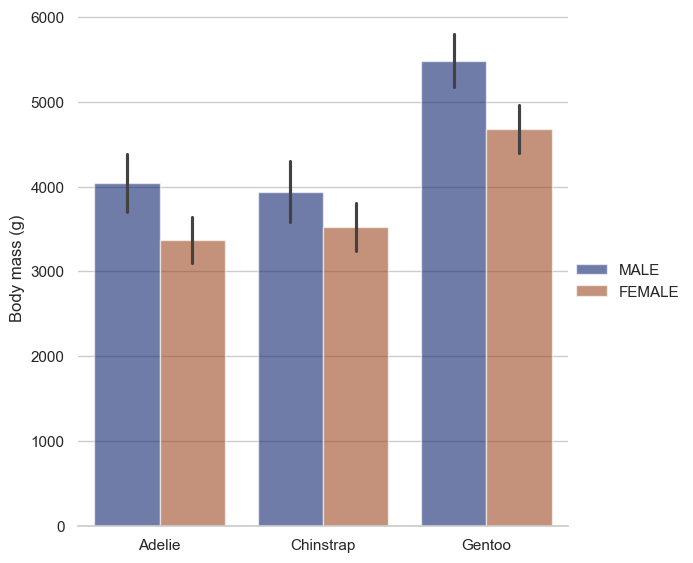

In [10]:
# 设置Seaborn主题为白色背景+网格线样式，使图表更清晰易读
sns.set_theme(style="whitegrid")

# 加载Seaborn内置的企鹅数据集，包含三种企鹅物种的身体测量数据
penguins = pd.read_csv("seaborn-data/penguins.csv")
display(penguins.sample(10))

# Draw a nested barplot by species and sex
g = sns.catplot(
        data=penguins,
        kind="bar",         # 指定绘制条形图
        x="species",        # x轴显示企鹅物种（Adelie, Chinstrap, Gentoo）
        y="body_mass_g",    # y轴显示体重数据（克）
        hue="sex",          # 按性别分组，创建嵌套条形图
        errorbar="sd",      # 误差条显示标准差（而非默认的置信区间）
        palette="dark",     # 使用深色调色板
        alpha=.6,           # 设置条形透明度为60%
        height=6            # 设置图形高度为6英寸
    )

g.despine(left=True)        # 移除左侧边框线，使图表更简洁
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")      # 移除图例标题（默认会显示"sex"）

这段代码使用Seaborn库创建了一个多面板点图(pointplot)，展示运动数据中脉搏(pulse)随多个分类变量的变化关系。

,Unnamed: 0,id,diet,pulse,time,kind
57,57,20,no fat,102,1 min,walking
43,43,15,low fat,96,15 min,walking
29,29,10,no fat,100,30 min,rest
67,67,23,low fat,105,15 min,running
59,59,20,no fat,103,30 min,walking
68,68,23,low fat,99,30 min,running
39,39,14,low fat,95,1 min,walking
63,63,22,low fat,98,1 min,running
21,21,8,no fat,92,1 min,rest
54,54,19,no fat,97,1 min,walking


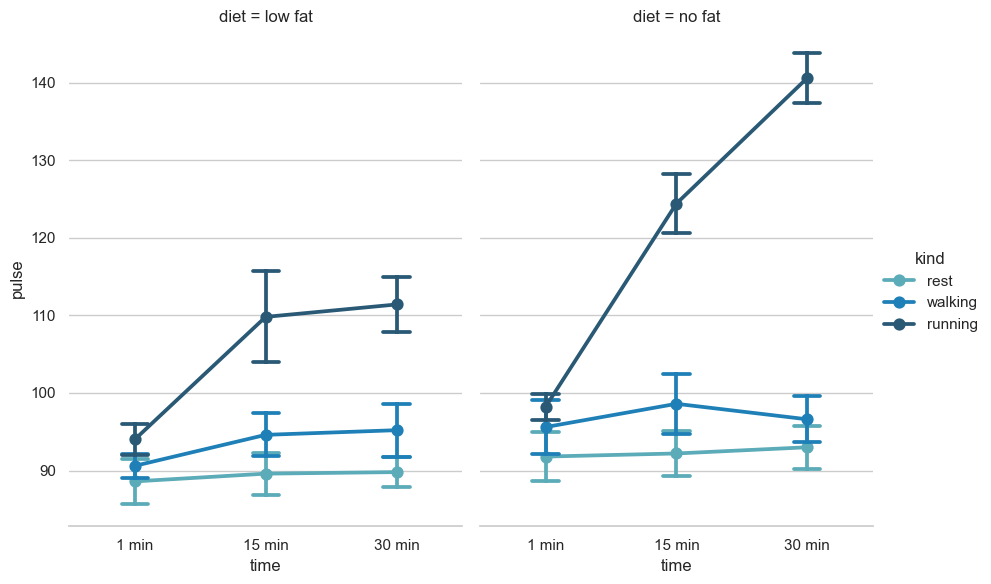

In [11]:
sns.set_theme(style="whitegrid")
exercise = pd.read_csv("seaborn-data/exercise.csv")
display(exercise.sample(10))

# 创建多面板点图
# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.catplot(
        data=exercise,
        x="time",       # x轴表示运动时间(分类变量)
        y="pulse",      # y轴表示脉搏(数值变量)
        hue="kind",     # 用颜色区分运动类型(第三个分类变量)
        col="diet",     # 按饮食类型分面(第四个分类变量，创建多列面板)
        capsize=.2,     # 设置误差线端帽长度为0.2(使误差范围更清晰)
        palette="YlGnBu_d", # 使用黄-绿-蓝渐变的深色调色板
        errorbar="se",  # 误差线表示标准误差(Standard Error)
        kind="point",   # 指定绘制点图(pointplot)，显示均值的点估计和误差范围
        height=6,
        aspect=.75,
    )
g.despine(left=True)